<a href="https://colab.research.google.com/github/Ftajedini/Github_Tutorial/blob/main/TimeSeries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TimeSeries Analysis
Temperature forcasting Example
francois Chollet p 282

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import timeseries_dataset_from_array

In [2]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-12-05 11:53:11--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.71.248, 54.231.233.208, 52.217.130.32, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.71.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  19.7MB/s    in 0.7s    

2023-12-05 11:53:12 (19.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [3]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.shape

(420451, 15)

In [5]:
df.drop(columns='Date Time', inplace = True)
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
temperature = df['T (degC)']
raw_data = df

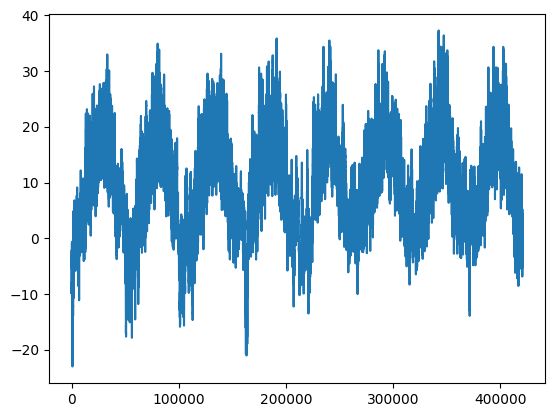

In [7]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

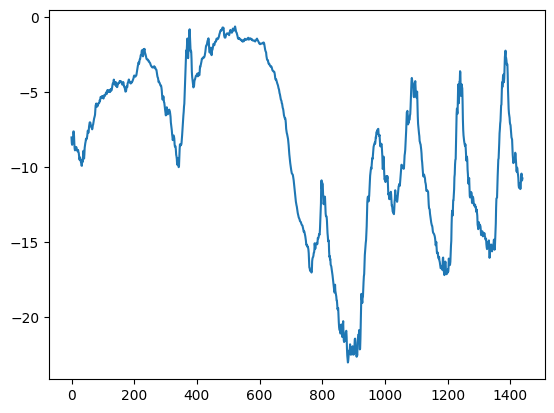

In [8]:
plt.plot(range(1440), temperature[:1440])

In [9]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


#Normalizing

In [10]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [11]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 128

train_dataset = timeseries_dataset_from_array(
      raw_data[:-delay],
      targets=temperature[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=0,
      end_index= num_train_samples)

val_dataset = timeseries_dataset_from_array(
      raw_data[:-delay],
      targets=temperature[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=num_train_samples,
      end_index=num_train_samples + num_val_samples)

test_dataset = timeseries_dataset_from_array(
      raw_data[:-delay],
      targets=temperature[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=num_train_samples + num_val_samples)




Inspecting the output of one of our datasets


In [12]:
#baraye design model
for samples, targets in train_dataset:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break


samples shape: (128, 120, 14)
targets shape: (128,)


# Computing the common-sense baseline MAE

In [13]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


# Training and evaluating a densely connected model

In [14]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
#x = layers.Flatten()(inputs)
x = layers.GlobalAveragePooling1D()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 global_average_pooling1d (  (None, 14)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.h5",
    save_best_only=True)
  ]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [21]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.h5")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1637/1637 [==============================] - 43s 26ms/step - loss: 21.7127 - mae: 3.7262 - val_loss: 20.5260 - val_mae: 3.5690


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
1637/1637 [==============================] - 44s 27ms/step - loss: 21.5514 - mae: 3.7111 - val_loss: 20.6014 - val_mae: 3.5803
Epoch 3/10
1637/1637 [==============================] - 56s 34ms/step - loss: 21.4527 - mae: 3.7010 - val_loss: 20.5186 - val_mae: 3.5713
Epoch 4/10
1637/1637 [==============================] - 55s 34ms/step - loss: 21.3491 - mae: 3.6907 - val_loss: 20.5483 - val_mae: 3.5778
Epoch 5/10
1637/1637 [==============================] - 55s 33ms/step - loss: 21.2536 - mae: 3.6823 - val_loss: 20.6876 - val_mae: 3.5868
Epoch 6/10
1637/1637 [==============================] - 51s 31ms/step - loss: 21.1713 - mae: 3.6755 - val_loss: 20.7193 - val_mae: 3.5882
Epoch 7/10
1637/1637 [==============================] - 44s 27ms/step - loss: 21.0805 - mae: 3.6674 - val_loss: 20.6577 - val_mae: 3.5735
Epoch 8/10
1637/1637 [==============================] - 74s 45ms/step - loss: 21.0086 - mae: 3.6613 - val_loss: 20.7283 - val_mae: 3.5833
Epoch 9/10
1637/1637 [============

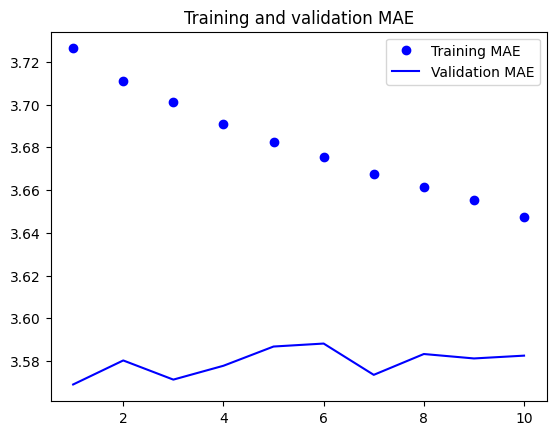

In [22]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

#A simple LSTM-based model

In [23]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1984      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
callbacks = [
       keras.callbacks.ModelCheckpoint("jena_lstm.h5",
                                       save_best_only=True)
]


model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [26]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.h5")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1637/1637 [==============================] - 55s 32ms/step - loss: 23.8205 - mae: 3.5062 - val_loss: 10.1731 - val_mae: 2.4790
Epoch 2/10
1637/1637 [==============================] - 56s 34ms/step - loss: 9.8085 - mae: 2.4494 - val_loss: 9.9947 - val_mae: 2.4418
Epoch 3/10
1637/1637 [==============================] - 49s 30ms/step - loss: 9.1960 - mae: 2.3677 - val_loss: 10.1919 - val_mae: 2.4655
Epoch 4/10
1637/1637 [==============================] - 58s 36ms/step - loss: 8.7617 - mae: 2.3105 - val_loss: 10.1581 - val_mae: 2.4602
Epoch 5/10
1637/1637 [==============================] - 51s 31ms/step - loss: 8.3223 - mae: 2.2599 - val_loss: 10.3498 - val_mae: 2.4757
Epoch 6/10
1637/1637 [==============================] - 60s 37ms/step - loss: 8.0040 - mae: 2.2173 - val_loss: 10.7910 - val_mae: 2.5396
Epoch 7/10
1637/1637 [==============================] - 50s 31ms/step - loss: 7.7490 - mae: 2.1793 - val_loss: 10.5926 - val_mae: 2.5157
Epoch 8/10
1637/1637 [===================

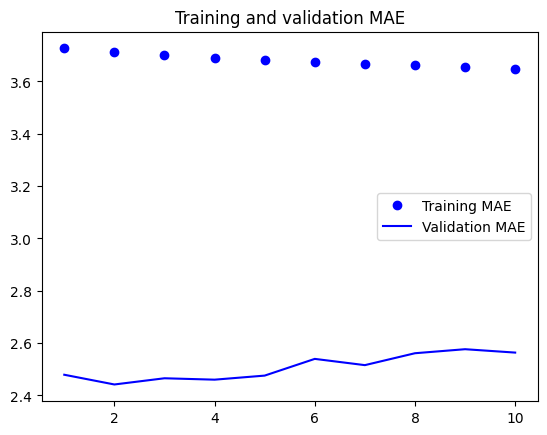

In [28]:
import matplotlib.pyplot as plt
#loss = history.history1["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

# Training and evaluating a bidirectional LSTM

In [29]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 bidirectional (Bidirection  (None, 32)                3968      
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4001 (15.63 KB)
Trainable params: 4001 (15.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)